## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')
import pandas as pd
import math
import lmfit

In [2]:
from funcoes_paredes import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

In [3]:
#from funcoes_sistemas import gerar_particulas_sistemas_separados

# Simulando o sistema:

## Parâmetros da simulação:

In [4]:
#Parâmetros da simulação:

numero_particulas = 300
tamanho_caixa = 50
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.4
tipo = 'atomo'

tempo_final = 50
numero_passos = 400
tempo_cada_passo = tempo_final/numero_passos

## Gerar Partículas:

def gerar_particulas_sistemas_separados(N, raio, massa, tamanho_caixa, tipo, num_sistemas):
    """Generate N Particle objects in separate lists for different systems."""
    sistemas_particulas = {i: [] for i in range(1, num_sistemas + 1)}  # Dicionário para armazenar partículas de cada sistema

    for i in range(N):
        magnitude_velocidade = np.random.rand(1) * 25
        angulo_velocidade = np.random.rand(1) * 2 * np.pi
        v = np.append(magnitude_velocidade * np.cos(angulo_velocidade), magnitude_velocidade * np.sin(angulo_velocidade))

        colisao = True
        while colisao:
            colisao = False
            pos = raio + np.random.rand(2) * (tamanho_caixa - 2 * raio)
            nova_particula = Particula(massa, raio, pos, v, tipo)

            # Verificar colisões com todas as partículas em todos os sistemas
            for sistema, particulas_sistema in sistemas_particulas.items():
                for particula_sistema in particulas_sistema:
                    if nova_particula.checar_colisão(particula_sistema):
                        colisao = True
                        break
                if colisao:
                    break

            # Se não houver colisões, adicionar a partícula ao sistema correspondente
            if not colisao:
                sistema_destino = i % num_sistemas + 1  # Calcula o sistema de destino usando o operador de módulo
                sistemas_particulas[sistema_destino].append(nova_particula)

    return sistemas_particulas


num_sistemas = 5  # Defina o número de sistemas desejado
particulas_por_sistema = gerar_particulas_sistemas_separados(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo, num_sistemas)

#print(particulas_por_sistema)
# Iterar por todos os sistemas e suas partículas
for sistema, particulas_sistema in particulas_por_sistema.items():
    print(f"Sistema {sistema}: {len(particulas_sistema)} partículas")
    #for particula in particulas_sistema:
     #   print(particula)  # Ou qualquer outra ação que você deseje fazer com a partícula


nova_lista = []
for key in particulas_por_sistema.keys():
    nova_lista.append(particulas_por_sistema[key])
    
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = nova_lista


#if len(nova_lista) == 5:  # Se você souber que são 3 listas
 #   lista_particulas_sistema1, lista2, lista3, lista4, lista5 = nova_lista

    # Agora você pode usar as variáveis lista1, lista2 e lista3 individualmente
print(len(lista_particulas_sistema1))
  

## Simulação da reação química com catalisador:

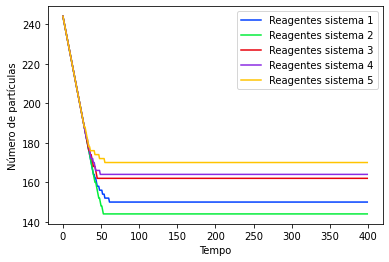

In [14]:
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1, lista_produtos_sistema1 = [], []
lista_reagentes_sistema2, lista_produtos_sistema2 = [], []
lista_reagentes_sistema3, lista_produtos_sistema3 = [], []
lista_reagentes_sistema4, lista_produtos_sistema4 = [], []
lista_reagentes_sistema5, lista_produtos_sistema5 = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1.append(a_count)
    lista_produtos_sistema1.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2.append(a_count)
    lista_produtos_sistema2.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3.append(a_count)
    lista_produtos_sistema3.append(m_count)
    
    simular_reacao(lista_particulas_sistema4, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4.append(a_count)
    lista_produtos_sistema4.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5, tempo_cada_passo, tamanho_caixa, probabilidade_reacao)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5.append(a_count)
    lista_produtos_sistema5.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1,label='Reagentes sistema 1')#, marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2,label='Reagentes sistema 2')#, marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3,label='Reagentes sistema 3')#, marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4,label='Reagentes sistema 4')#, marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5,label='Reagentes sistema 5')#, marker = '*')


#plt.plot(list(range(numero_passos)),lista_produtos_sistema1,label='Produto sistema 1', marker = '*')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema2,label='Produto sistema 2', marker = '*')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema3,label='Produto sistema 3', marker = '*')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema4,label='Produto sistema 4', marker = '*')
#plt.plot(list(range(numero_passos)),lista_produtos_sistema5,label='Produto sistema 5', marker = '*')


plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
#plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

## Criando DataFrame para trabalhar com os dados:

In [12]:
lista = {'Reagentes sistema 1': lista_reagentes_sistema1, 'Reagentes sistema 2': lista_reagentes_sistema2, 'Reagentes sistema 3': lista_reagentes_sistema3, 'Reagentes sistema 4': lista_reagentes_sistema4, 'Reagentes sistema 5': lista_reagentes_sistema5, 'tempo': range(numero_passos)}

print(len(lista_reagentes_sistema1))
print(len(lista_reagentes_sistema1))
print(len(range(numero_passos)))


df = pd.DataFrame(lista)

sistema1_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]
sistema2_df = df['Reagentes sistema 2'] #df.iloc[0 : 70, 0]
sistema3_df = df['Reagentes sistema 3'] #df.iloc[0 : 70, 0]
sistema4_df = df['Reagentes sistema 4'] #df.iloc[0 : 70, 0]
sistema5_df = df['Reagentes sistema 5'] #df.iloc[0 : 70, 0]

temporeacao = df['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe.csv', index=False)


400
400
400


## Fitagem com função exponencial:

In [13]:
def exponencial(t, a, k):
    return a * np.exp(-k * t)

def funcao_quadratica(x, a, b, c):
    return a * x**2 + b * x + c

popt, _ = curve_fit(exponencial, temporeagente, lista_atomos)
# valores_fit_reagente = funcao_quadratica(temporeagente, *popt)

k = popt[1]
print("O valor de k é:", k)


NameError: name 'temporeagente' is not defined

In [ ]:
# Sistema 1
popt1, _ = curve_fit(exponencial, temporeagente, atomodf)
    parametros_ajustados.append(popt1)
    valores_fit_reagente = exponencial(temporeagente, *popt1)
    valores_ajustados.append(valores_fit_reagente)

In [ ]:
# Suponha que você tenha cinco listas de dados diferentes
# Aqui, eu estou usando listas fictícias como exemplo:
temporeagente = list(range(numero_passos))

# Lista de todas as listas de dados
listas_reagentes = [lista_reagentes_sistema1, lista_reagentes_sistema2, lista_reagentes_sistema3, lista_reagentes_sistema4, lista_reagentes_sistema5]  # Adicione as outras listas de dados aqui

# Função exponencial
def exponencial(t, a, k):
    return a * np.exp(-k * t)

# Ajuste da função exponencial para cada lista de dados
parametros_ajustados = []
valores_ajustados = []

for atomos in listas_reagentes:
    popt, _ = curve_fit(exponencial, temporeagente, atomos)
    parametros_ajustados.append(popt)
    valores_fit_reagente = exponencial(temporeagente, *popt)
    valores_ajustados.append(valores_fit_reagente)

    # Plot do ajuste para cada lista de dados
    plt.plot(temporeagente, atomos, label='Dados Originais')
    plt.plot(temporeagente, valores_fit_reagente, label='Ajuste Exponencial')
    plt.xlabel('Tempo')
    plt.ylabel('Lista de Átomos')
    plt.legend()
    plt.show()

# Após o loop, você terá os ajustes e pode plotar todos em um único gráfico se desejar.


In [ ]:
def fit(x, k, C, D):
    return C * np.exp(-k * x) + D

taxas = []

for idx, sistema_df in enumerate([sistema1_df, sistema2_df, sistema3_df, sistema4_df, sistema5_df]):
    funcao_fit_model = lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D', value=30, vary=True)
    funcao_fit_model.set_param_hint('C', value=150, vary=True)
    funcao_fit_model.set_param_hint('k', value=0.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x=temporeacao, params=param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value

    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)

    taxas.append(k)

    print('k =', k)
    plt.scatter(x_fit, y_fit, label=f'fit sistema {idx + 1}')
    plt.plot(temporeacao, sistema_df, label=f'dados sistema {idx + 1}')
    plt.xlim(0, 100)

plt.legend()
plt.show()


In [ ]:
def calcular_temperatura(lista_particulas, massa):
    """
    Calcula uma estimativa da temperatura do sistema com base na distribuição de Maxwell-Boltzmann das velocidades.

    Args:
        lista_particulas (list): Uma lista de objetos que contêm informações sobre as partículas.
            Cada objeto deve ter um atributo 'velocidade' que represente a velocidade da partícula como um vetor.
        massa (float): A massa das partículas em unidades apropriadas (por exemplo, kg).

    Returns:
        float: A temperatura estimada em Kelvin.

    Note:
        Esta estimativa assume que as velocidades das partículas seguem a distribuição de Maxwell-Boltzmann
        e que o sistema se comporta como um gás ideal.
    """
    v_quadrado_medio = 0
    
    for particula in lista_particulas:
        v_quadrado_medio += np.dot(particula.velocidade, particula.velocidade)
            
    v_quadrado_medio /= len(lista_particulas)
    
    kB = 1.380649e-23    # Constante de Boltzmann em J/K #aproximação

    temperatura = (massa * v_quadrado_medio) * numero_particulas / (3 * kB)
    
    return temperatura

In [ ]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol

# Calcular a temperatura
temperatura_sistema1 = calcular_temperatura(lista_particulas_sistema1, massa_particula)
temperatura_sistema2 = calcular_temperatura(lista_particulas_sistema2, massa_particula)
temperatura_sistema3 = calcular_temperatura(lista_particulas_sistema3, massa_particula)
temperatura_sistema4 = calcular_temperatura(lista_particulas_sistema4, massa_particula)
temperatura_sistema5 = calcular_temperatura(lista_particulas_sistema5, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5:.2f} K.")

temperaturas_arrhenius = [temperatura_sistema1, temperatura_sistema2, temperatura_sistema3, temperatura_sistema4, temperatura_sistema5] #tem que transformar em array?

In [ ]:
def arrhenius_eq(T, A, Ea):
    """
    Calcula a constante de taxa (k) utilizando a Lei de Arrhenius.
    
    Args:
        A (float): Fator de pré-exponencial de Arrhenius.
        Ea (float): Energia de ativação em Joules por mol.
        R (float): Constante dos gases ideais em Joules por mol por Kelvin.
        T (float): Temperatura em Kelvin.
        
    Returns:
        float: Constante de taxa (k).
    """
    R = 8.314  # Constante dos gases ideais em J/(mol K)
    
    return A * np.exp(-(Ea / (R * T)))

In [ ]:
temperaturas_arrhenius = np.array(temperaturas_arrhenius)

# Transformação dos dados
ln_taxas = np.log(taxas)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius, ln_taxas)
A_fit_catalisador, Ea_fit_catalisador = params

# Calcular os valores ajustados
valores_ajustados = arrhenius_eq(temperaturas_arrhenius, A_fit, Ea_fit)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {A_fit_catalisador}")
print(f"Energia de ativação (Ea): {Ea_fit_catalisador} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas_arrhenius, ln_taxas, color='red', label='Dados simulados')
plt.plot(temperaturas_arrhenius, valores_ajustados, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()


## Simulação da reação química sem catalisador:

In [ ]:
from funcoes import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

In [ ]:
lista_particulas_sistema1_sem_catalisador, lista_particulas_sistema2_sem_catalisador, lista_particulas_sistema3_sem_catalisador, lista_particulas_sistema4_sem_catalisador, lista_particulas_sistema5_sem_catalisador = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1_sem_catalisador, lista_produtos_sistema1_sem_catalisador = [], []
lista_reagentes_sistema2_sem_catalisador, lista_produtos_sistema2_sem_catalisador = [], []
lista_reagentes_sistema3_sem_catalisador, lista_produtos_sistema3_sem_catalisador = [], []
lista_reagentes_sistema4_sem_catalisador, lista_produtos_sistema4_sem_catalisador = [], []
lista_reagentes_sistema5_sem_catalisador, lista_produtos_sistema5_sem_catalisador = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1_sem_catalisador.append(a_count)
    lista_produtos_sistema1_sem_catalisador.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2_sem_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2_sem_catalisador.append(a_count)
    lista_produtos_sistema2_sem_catalisador.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3_sem_catalisador.append(a_count)
    lista_produtos_sistema3_sem_catalisador.append(m_count)
    
    simular_reacao(lista_particulas_sistema4_sem_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4_sem_catalisador.append(a_count)
    lista_produtos_sistema4_sem_catalisador.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5_sem_catalisador.append(a_count)
    lista_produtos_sistema5_sem_catalisador.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1_sem_catalisador,label='Reagentes sistema 1_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2_sem_catalisador,label='Reagentes sistema 2_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3_sem_catalisador,label='Reagentes sistema 3_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4_sem_catalisador,label='Reagentes sistema 4_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5_sem_catalisador,label='Reagentes sistema 5_sem_catalisador', marker = '*')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

In [ ]:
lista_particulas_sistema1_sem_catalisador, lista_particulas_sistema2_sem_catalisador, lista_particulas_sistema3_sem_catalisador, lista_particulas_sistema4_sem_catalisador, lista_particulas_sistema5_sem_catalisador = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1_sem_catalisador, lista_produtos_sistema1_sem_catalisador = [], []
lista_reagentes_sistema2_sem_catalisador, lista_produtos_sistema2_sem_catalisador = [], []
lista_reagentes_sistema3_sem_catalisador, lista_produtos_sistema3_sem_catalisador = [], []
lista_reagentes_sistema4_sem_catalisador, lista_produtos_sistema4_sem_catalisador = [], []
lista_reagentes_sistema5_sem_catalisador, lista_produtos_sistema5_sem_catalisador = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
    
    # Simular colisões
    simular_reacao(lista_particulas_sistema1_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1_sem_catalisador.append(a_count)
    lista_produtos_sistema1_sem_catalisador.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2_sem_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2_sem_catalisador.append(a_count)
    lista_produtos_sistema2_sem_catalisador.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3_sem_catalisador.append(a_count)
    lista_produtos_sistema3_sem_catalisador.append(m_count)
    
    simular_reacao(lista_particulas_sistema4_sem_catalisador, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4_sem_catalisador.append(a_count)
    lista_produtos_sistema4_sem_catalisador.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5_sem_catalisador, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5_sem_catalisador, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5_sem_catalisador:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5_sem_catalisador.append(a_count)
    lista_produtos_sistema5_sem_catalisador.append(m_count)
    

plt.plot(list(range(numero_passos)),lista_reagentes_sistema1_sem_catalisador,label='Reagentes sistema 1_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema2_sem_catalisador,label='Reagentes sistema 2_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema3_sem_catalisador,label='Reagentes sistema 3_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema4_sem_catalisador,label='Reagentes sistema 4_sem_catalisador', marker = '*')
plt.plot(list(range(numero_passos)),lista_reagentes_sistema5_sem_catalisador,label='Reagentes sistema 5_sem_catalisador', marker = '*')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
plt.xlim(0, 50)  # Define os limites do eixo x de 0 a 100
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

#

In [ ]:
lista = {'Reagentes sistema 1 sem catalisador': lista_reagentes_sistema1_sem_catalisador, 'Reagentes sistema 2 sem catalisador': lista_reagentes_sistema2_sem_catalisador, 'Reagentes sistema 3 sem catalisador': lista_reagentes_sistema3_sem_catalisador, 'Reagentes sistema 4 sem catalisador': lista_reagentes_sistema4_sem_catalisador, 'Reagentes sistema 5 sem catalisador': lista_reagentes_sistema5_sem_catalisador, 'tempo': range(numero_passos)}

df_sem_catalisador = pd.DataFrame(lista)

sistema1_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 1 sem catalisador'] #df.iloc[0 : 70, 0]
sistema2_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 2 sem catalisador'] #df.iloc[0 : 70, 0]
sistema3_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 3 sem catalisador'] #df.iloc[0 : 70, 0]
sistema4_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 4 sem catalisador'] #df.iloc[0 : 70, 0]
sistema5_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 5 sem catalisador'] #df.iloc[0 : 70, 0]

temporeacao = df_sem_catalisador['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe.csv', index=False)


In [ ]:
lista = {'Reagentes sistema 1 sem catalisador': lista_reagentes_sistema1_sem_catalisador, 'Reagentes sistema 2 sem catalisador': lista_reagentes_sistema2_sem_catalisador, 'Reagentes sistema 3 sem catalisador': lista_reagentes_sistema3_sem_catalisador, 'Reagentes sistema 4 sem catalisador': lista_reagentes_sistema4_sem_catalisador, 'Reagentes sistema 5 sem catalisador': lista_reagentes_sistema5_sem_catalisador, 'tempo': range(numero_passos)}

df_sem_catalisador = pd.DataFrame(lista)

sistema1_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 1 sem catalisador'] #df.iloc[0 : 70, 0]
sistema2_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 2 sem catalisador'] #df.iloc[0 : 70, 0]
sistema3_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 3 sem catalisador'] #df.iloc[0 : 70, 0]
sistema4_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 4 sem catalisador'] #df.iloc[0 : 70, 0]
sistema5_df_sem_catalisador = df_sem_catalisador['Reagentes sistema 5 sem catalisador'] #df.iloc[0 : 70, 0]

temporeacao = df_sem_catalisador['tempo'] #df.iloc[0:70, 2]

df.to_csv('meu_dataframe.csv', index=False)


In [ ]:
def fit(x, k, C, D):
    return C * np.exp(-k * x) + D

taxas_sem_catalisador = []

for idx, sistema_df in enumerate([sistema1_df_sem_catalisador, sistema2_df_sem_catalisador, sistema3_df_sem_catalisador, sistema4_df_sem_catalisador, sistema5_df_sem_catalisador]):
    funcao_fit_model = lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D', value=30, vary=True)
    funcao_fit_model.set_param_hint('C', value=150, vary=True)
    funcao_fit_model.set_param_hint('k', value=0.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x=temporeacao, params=param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value

    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)

    taxas_sem_catalisador.append(k)

    print('k =', k)
    plt.scatter(x_fit, y_fit, label=f'fit sistema {idx + 1}')
    plt.plot(temporeacao, sistema_df, label=f'dados sistema {idx + 1}')
    plt.xlim(0, 100)

plt.legend()
plt.show()


In [ ]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol

# Calcular a temperatura
temperatura_sistema1_sem_catalisador = calcular_temperatura(lista_particulas_sistema1_sem_catalisador, massa_particula)
temperatura_sistema2_sem_catalisador = calcular_temperatura(lista_particulas_sistema2_sem_catalisador, massa_particula)
temperatura_sistema3_sem_catalisador = calcular_temperatura(lista_particulas_sistema3_sem_catalisador, massa_particula)
temperatura_sistema4_sem_catalisador = calcular_temperatura(lista_particulas_sistema4_sem_catalisador, massa_particula)
temperatura_sistema5_sem_catalisador = calcular_temperatura(lista_particulas_sistema5_sem_catalisador, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1_sem_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2_sem_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3_sem_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4_sem_catalisador:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5_sem_catalisador:.2f} K.")

temperaturas_arrhenius_sem_catalisador = [temperatura_sistema1_sem_catalisador, temperatura_sistema2_sem_catalisador, temperatura_sistema3_sem_catalisador, temperatura_sistema4_sem_catalisador, temperatura_sistema5_sem_catalisador] #tem que transformar em array?

In [ ]:
temperaturas_arrhenius_sem_catalisador = np.array(temperaturas_arrhenius_sem_catalisador)

# Transformação dos dados
ln_taxas_sem_catalisador = np.log(taxas_sem_catalisador)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius_sem_catalisador, ln_taxas_sem_catalisador)
A_fit_sem_catalisador, Ea_fit_sem_catalisador = params

# Calcular os valores ajustados
valores_ajustados_sem_catalisador = arrhenius_eq(temperaturas_arrhenius_sem_catalisador, A_fit_sem_catalisador, Ea_fit_sem_catalisador)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {A_fit_sem_catalisador}")
print(f"Energia de ativação (Ea): {Ea_fit_sem_catalisador} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas_arrhenius_sem_catalisador, ln_taxas_sem_catalisador, color='red', label='Dados simulados')
plt.plot(temperaturas_arrhenius_sem_catalisador, valores_ajustados_sem_catalisador, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()
